In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../../data/new/final_sum.csv')
df

,종목명,업종명,평가연도,총자산규모(Size),부채비율(DEB),자기자본비율(DEB),매출액증가율,현금흐름(CF),PBR,ESG,E,S,G,배당지급(DV)
0,CS홀딩스,서비스업,2011,1.887535e+11,15.95,86.25,30.53,2.825215,0.390,2.0,3.0,2.0,2.0,0.0
1,KISCO홀딩스,서비스업,2011,7.797319e+11,14.21,87.56,5.37,2.934351,0.325,2.0,4.0,2.0,2.0,2753000.0
2,LG이노텍,전기전자,2011,4.409967e+12,232.87,30.04,10.95,0.067556,1.760,5.0,4.0,5.0,5.0,0.0
3,MH에탄올,음식료품,2011,1.342069e+11,214.54,31.79,-18.64,0.004139,0.360,2.0,3.0,2.0,2.5,0.0
4,OCI,화학,2011,7.205013e+12,93.68,51.63,28.71,0.403283,3.025,5.0,5.0,5.0,5.0,52469000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,효성,화학,2018,6.407905e+12,137.14,42.17,-76.16,0.749371,1.210,2.5,2.0,4.0,4.0,101654000.0
3186,후성,화학,2018,4.414810e+11,79.83,55.61,10.49,0.114226,4.185,2.5,3.0,2.5,4.0,0.0
3187,휴비스,화학,2018,9.580854e+11,134.75,42.60,-1.44,0.040373,1.030,4.0,4.0,4.0,4.0,9873000.0
3188,휴스틸,철강금속,2018,6.034554e+11,48.63,67.28,-14.74,0.212035,0.325,2.5,3.0,2.5,2.5,3014000.0


In [5]:
df.columns

Index(['종목명', '업종명', '평가연도', '총자산규모(Size)', '부채비율(DEB)', '자기자본비율(DEB)',
       '매출액증가율', '현금흐름(CF)', 'PBR', 'ESG', 'E', 'S', 'G', '배당지급(DV)'],
      dtype='object')

## 변수별로 이상치 체크
* '총자산규모(Size)', '부채비율(DEB)', '자기자본비율(DEB)',
       '매출액증가율', '현금흐름(CF)', 'PBR', 'ESG', 'E', 'S', 'G', '배당지급(DV)'

In [6]:
size = df['총자산규모(Size)']
deb = df['부채비율(DEB)']
sales = df['매출액증가율']
cf = df['현금흐름(CF)']
pbr = df['PBR']
esg = df['ESG']
e = df['E']
s = df['S']
g = df['G']
dv = df['배당지급(DV)']

In [11]:
def winsorizing(x):
    # 임계치 설정 (98%)
    threshold = np.percentile(x, 98)
    # box plot 그리기
    plt.boxplot(x)
    # 이상치 표시
    outliers = [val for val in x if (val > threshold)|(val < -threshold)]
    for outlier in outliers:
        plt.plot(1, outlier, 'ro')

    plt.show()

    outliers = [val for val in x if (val > threshold)|(val < -threshold)]
    print('이상치 데이터 : ', outliers)
    len(outliers)

    # 이상치 제외한 값을 원본에 저장
    # df = df[~x.isin(outliers)]

    return x

### 총자산규모 이상치

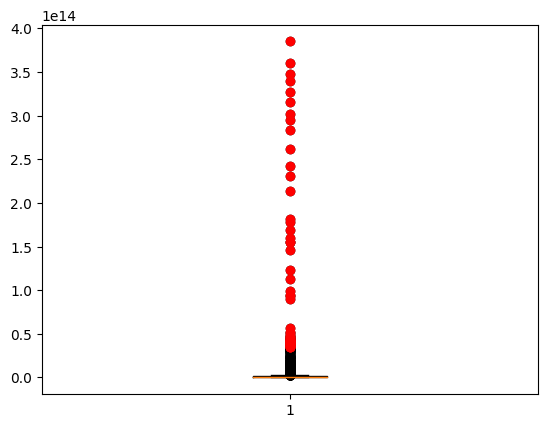

이상치 데이터 :  [35026880858000.0, 155631254000000.0, 178228882000000.0, 36010498709000.0, 36857044868000.0, 181071570000000.0, 283722235000000.0, 40621718532000.0, 35288869208000.0, 38972565738000.0, 214075018000000.0, 295188639000000.0, 43666375501000.0, 113322609673000.0, 35101313814000.0, 40072325738000.0, 230422958000000.0, 315548246000000.0, 46772022425000.0, 123684262290000.0, 39111916000000.0, 90279548107000.0, 39811176000000.0, 40693366455000.0, 34841940000000.0, 42361430965000.0, 242179521000000.0, 326912708000000.0, 42385339683000.0, 145621715231000.0, 37774833000000.0, 93482189322000.0, 45798925000000.0, 41915906500000.0, 37543724235000.0, 57267775961000.0, 44458515390000.0, 262174324000000.0, 348177491000000.0, 39927835678000.0, 154871038000000.0, 41711608000000.0, 94349977199000.0, 47593660000000.0, 42052829383000.0, 49048902937000.0, 301752090000000.0, 37948260013000.0, 359992234000000.0, 37139439444000.0, 160194978000000.0, 41736819000000.0, 98793581957000.0, 50929102340000.

0       1.887535e+11
1       7.797319e+11
2       4.409967e+12
3       1.342069e+11
4       7.205013e+12
            ...     
3185    6.407905e+12
3186    4.414810e+11
3187    9.580854e+11
3188    6.034554e+11
3189    8.036985e+11
Name: 총자산규모(Size), Length: 3190, dtype: float64

In [11]:
winsorizing(size)

### 부채비율 이상치

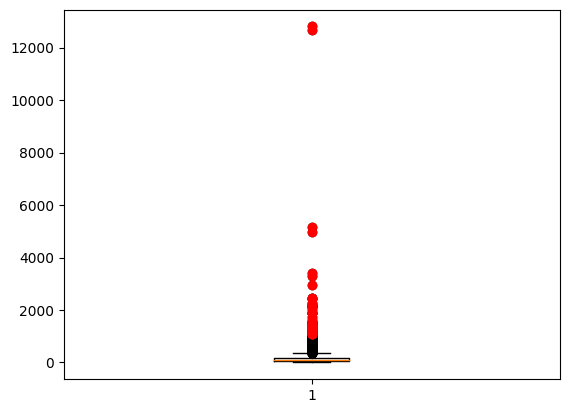

이상치 데이터 :  [1069.25, 1365.61, 12807.68, 1102.55, 1418.02, 1431.39, 1349.75, 1557.66, 1535.69, 2141.88, 1292.55, 1516.27, 1300.13, 1458.35, 3298.51, 1871.54, 1287.89, 1313.09, 1546.75, 12674.97, 1893.49, 2451.76, 3392.18, 2109.67, 1715.73, 2282.87, 2161.97, 1341.28, 1636.29, 1358.31, 1386.19, 2950.77, 1881.51, 4990.1, 1303.87, 2458.97, 1323.11, 1271.03, 1219.04, 1445.27, 1259.84, 2184.71, 1178.12, 2113.35, 1257.29, 1444.71, 1181.79, 1388.57, 1401.81, 1132.36, 1442.05, 1374.49, 2239.35, 1274.24, 1349.95, 1157.32, 1072.63, 1252.68, 2423.35, 1164.49, 5148.88, 2012.65, 1320.25, 1082.14]


0        15.95
1        14.21
2       232.87
3       214.54
4        93.68
         ...  
3185    137.14
3186     79.83
3187    134.75
3188     48.63
3189    998.73
Name: 부채비율(DEB), Length: 3190, dtype: float64

In [12]:
winsorizing(deb)

### 매출액증가율 이상치

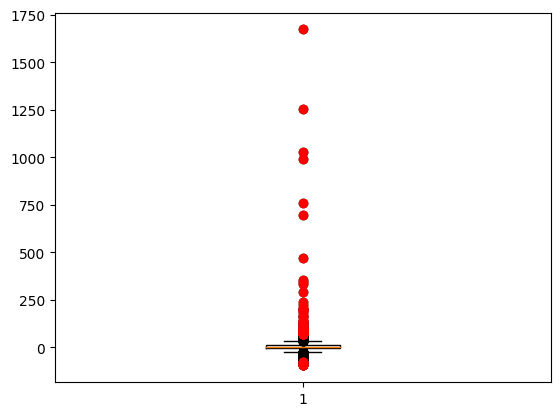

이상치 데이터 :  [162.71, 140.74, 75.03, 94.48, 115.41, 70.18, 696.1, 182.77, 123.2, 76.49, 761.39, 162.9, 472.18, 114.45, 81.79, 83.5, 92.48, 103.54, 341.13, 200.63, 992.19, 236.65, 75.35, 81.76, 89.41, 78.18, 77.61, 69.89, 141.79, 82.94, 74.28, 160.15, 73.07, 86.13, 110.59, -92.23, 82.28, -82.13, 127.19, -91.44, 71.67, -76.78, 193.94, -83.5, 104.38, 188.86, 1252.93, 103.36, 103.08, 356.02, 78.81, -95.28, 292.65, 134.07, 128.79, -92.8, 84.58, 72.57, 202.26, 122.01, 89.71, 69.54, -77.18, 333.09, 206.02, 76.56, 1025.83, 82.96, 1671.81, 221.18, 69.74, 70.18, -76.16]


0       30.53
1        5.37
2       10.95
3      -18.64
4       28.71
        ...  
3185   -76.16
3186    10.49
3187    -1.44
3188   -14.74
3189    -9.87
Name: 매출액증가율, Length: 3190, dtype: float64

In [13]:
winsorizing(sales)

### 현금흐름 이상치

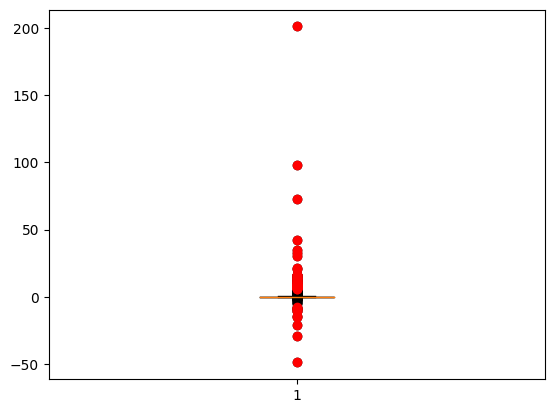

이상치 데이터 :  [6.673549306345236, 7.547692497625831, -15.157799489866196, 34.9218368004688, 5.918390979568764, 8.73202450768388, 201.0892761105733, 10.309542394014963, 10.532971168437026, 6.155381962094256, 20.881832317713805, 7.306311608626952, 6.503431123189362, 7.283085972850679, 42.5700101355156, 7.449301675977654, 8.986409485506892, -48.91969980492911, 72.84122419252692, 9.217269945507894, 7.791512423625255, 9.55172878897752, 16.48374467419261, 15.97928811149033, 11.399390461063852, 13.56916380182002, -14.509738994935722, 14.617137563451776, 7.873893982420554, -29.583817549071, 32.491118475708866, 11.232829890780238, 7.895382843137255, 16.226410776235905, -8.29413902219556, 6.770633148952983, 6.134743520918403, 6.49520178096025, -8.62904699272613, 9.28010955841252, -10.86246469499724, 7.96873088918151, 13.110445640919446, 8.853352875824557, 7.457226834493841, 8.853252551544626, 8.0562963449353, 8.827283036649215, 8.23929051936724, 6.488152692307692, 12.0639094063768, 11.1133455806404

0       2.825215
1       2.934351
2       0.067556
3       0.004139
4       0.403283
          ...   
3185    0.749371
3186    0.114226
3187    0.040373
3188    0.212035
3189   -0.047935
Name: 현금흐름(CF), Length: 3190, dtype: float64

In [14]:
winsorizing(cf)

### PBR 이상치

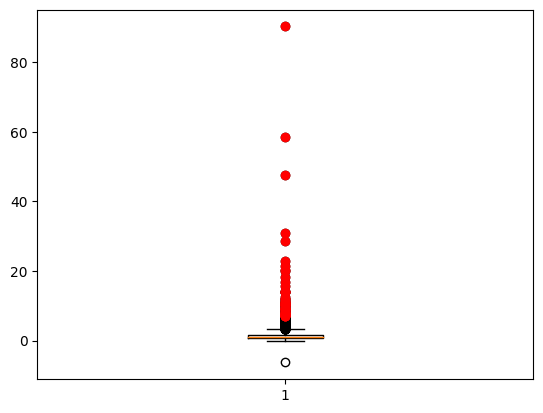

이상치 데이터 :  [8.11, 10.365, 7.755, 90.23, 10.915, 30.770000000000003, 14.15, 8.48, 10.68, 7.715, 7.449999999999999, 10.085, 22.815, 20.05, 6.99, 9.33, 7.635, 7.904999999999999, 8.005, 11.8, 10.115, 8.455, 9.09, 7.57, 14.07, 10.275, 13.955, 7.385, 9.08, 7.305, 18.155, 7.005, 7.459999999999999, 7.695, 8.285, 7.25, 11.925, 11.105, 10.71, 11.135, 47.705000000000005, 12.64, 16.73, 9.205, 7.984999999999999, 9.005, 7.0600000000000005, 10.365, 9.28, 9.19, 9.495, 7.654999999999999, 9.805, 11.855, 7.05, 21.405, 13.875, 28.665, 58.36, 20.3, 7.28, 10.65, 11.06, 15.81]


0       0.390
1       0.325
2       1.760
3       0.360
4       3.025
        ...  
3185    1.210
3186    4.185
3187    1.030
3188    0.325
3189    2.030
Name: PBR, Length: 3190, dtype: float64

In [15]:
winsorizing(pbr)

### ESG 이상치

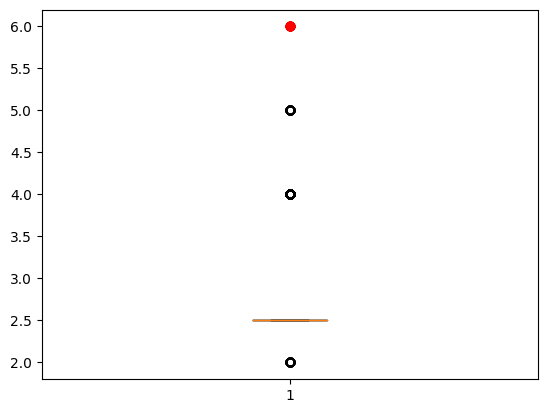

이상치 데이터 :  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


0       2.0
1       2.0
2       5.0
3       2.0
4       5.0
       ... 
3185    2.5
3186    2.5
3187    4.0
3188    2.5
3189    2.5
Name: ESG, Length: 3190, dtype: float64

In [16]:
winsorizing(esg)

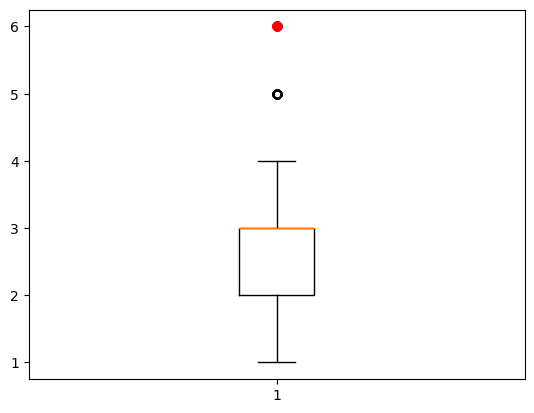

이상치 데이터 :  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


0       3.0
1       4.0
2       4.0
3       3.0
4       5.0
       ... 
3185    2.0
3186    3.0
3187    4.0
3188    3.0
3189    2.0
Name: E, Length: 3190, dtype: float64

In [17]:
winsorizing(e)

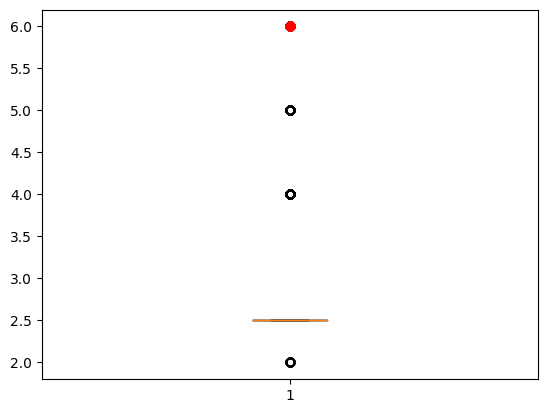

이상치 데이터 :  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


0       2.0
1       2.0
2       5.0
3       2.0
4       5.0
       ... 
3185    4.0
3186    2.5
3187    4.0
3188    2.5
3189    2.5
Name: S, Length: 3190, dtype: float64

In [18]:
winsorizing(s)

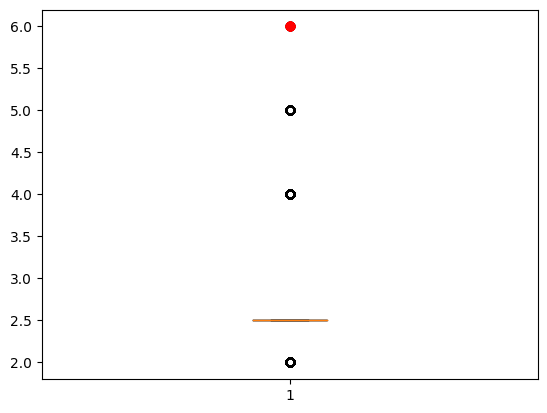

이상치 데이터 :  [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


0       2.0
1       2.0
2       5.0
3       2.5
4       5.0
       ... 
3185    4.0
3186    4.0
3187    4.0
3188    2.5
3189    2.5
Name: G, Length: 3190, dtype: float64

In [19]:
winsorizing(g)

### 배당금 이상치

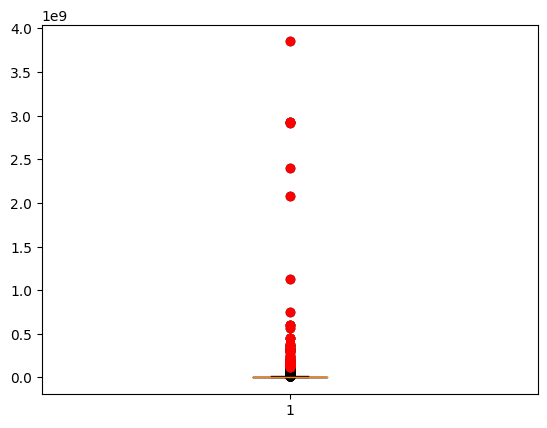

이상치 데이터 :  [261001000.0, 184734000.0, 752195000.0, 167236000.0, 298278000.0, 153068000.0, 1131255000.0, 181571000.0, 298278000.0, 147999000.0, 2081603000.0, 123613000.0, 186349000.0, 172328000.0, 2924564000.0, 148348000.0, 130452000.0, 286624000.0, 447386000.0, 198684000.0, 150231000.0, 2919821000.0, 173101000.0, 208032000.0, 148002000.0, 330987000.0, 596495000.0, 200712000.0, 150231000.0, 134768000.0, 3850352000.0, 164416000.0, 234700000.0, 236802000.0, 331466000.0, 166343000.0, 596495000.0, 200712000.0, 176742000.0, 146141000.0, 359892000.0, 329938000.0, 154700000.0, 2929530000.0, 164416000.0, 154703000.0, 370004000.0, 331466000.0, 166343000.0, 126597000.0, 564616000.0, 182465000.0, 194417000.0, 147007000.0, 359892000.0, 329937000.0, 154700000.0, 2405428000.0, 125020000.0, 170818000.0, 124584000.0, 450363000.0, 123750000.0, 378819000.0]


0               0.0
1         2753000.0
2               0.0
3               0.0
4        52469000.0
           ...     
3185    101654000.0
3186            0.0
3187      9873000.0
3188      3014000.0
3189            0.0
Name: 배당지급(DV), Length: 3190, dtype: float64

In [20]:
winsorizing(dv)

## 스케일링 데이터로 다시 찍어보기

In [1]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
scaler2=StandardScaler()

In [7]:
df = pd.read_csv('../../data/new/final_sum.csv')

In [8]:
df['총자산규모(Size)']=scaler.fit_transform(df['총자산규모(Size)'].values.reshape(-1,1))
#df['총자산규모(Size)']=np.log(df['총자산규모(Size)'])
df['부채비율(DEB)']=(df['부채비율(DEB)'])/100
df['자기자본비율(DEB)']= (df['자기자본비율(DEB)'])/100
df['매출액증가율']= (df['매출액증가율'])/100

In [9]:
size = df['총자산규모(Size)']
deb = df['부채비율(DEB)']
sales = df['매출액증가율']
cf = df['현금흐름(CF)']
pbr = df['PBR']
esg = df['ESG']
e = df['E']
s = df['S']
g = df['G']
dv = df['배당지급(DV)']

총자산규모

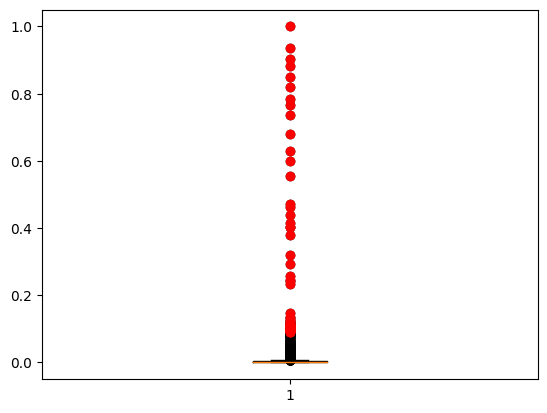

이상치 데이터 :  [0.09093271365715765, 0.4041990300142911, 0.4628957049154067, 0.09348763213033018, 0.09568651091015659, 0.47027950348848274, 0.7369115903556677, 0.1054651401611824, 0.0916132207001017, 0.10118151422435025, 0.556004990157786, 0.7666952379080945, 0.11337354719818686, 0.2943035692354496, 0.09112605107382195, 0.10403810851775357, 0.5984682840700031, 0.8195787190059105, 0.12144037385166032, 0.3212176575237577, 0.101543472436336, 0.23444989373172442, 0.10335977974484441, 0.10565124353644247, 0.09045233521133318, 0.10998399210003323, 0.6290056111012067, 0.8490975752079899, 0.11004609429269471, 0.3781995471024515, 0.09807043862204326, 0.24276866020676194, 0.11891278187597429, 0.10882675538994144, 0.0974701403940167, 0.14870278533771658, 0.11543110728992918, 0.6809415245255206, 0.9043322243753171, 0.10366279983144973, 0.40222439128642873, 0.10829609603767289, 0.24502271372509574, 0.12357455331626235, 0.10918240855628147, 0.12735450409584123, 0.7837436090723778, 0.09852091019371144, 0

0       0.000442
1       0.001977
2       0.011406
3       0.000300
4       0.018666
          ...   
3185    0.016596
3186    0.001098
3187    0.002440
3188    0.001519
3189    0.002039
Name: 총자산규모(Size), Length: 3190, dtype: float64

In [14]:
winsorizing(size)